## PARCEIROS 360

###  Pagamento - Utilização Factoring & Bloqueios

- <b>Analista(s)</b>: Victor Hugo
- <b>Projeto</b>: Parceiros 360 - Um modelo de análise de risco para auxiliar no controle das tomadas de decisões através de análises preditivas
- <b>Data</b>: 19/10/2022
- <b>Pilar</b>: Aliados
- <b>Indicador/KPI</b>: 
    - Aliados - Endividamento Encargos Sociais
    - Aliados - Contencioso Trabalhista vs. Aliados Ativos
    - Aliados - Variação de Aliados
- <b>Fator de Sensibilidade e Ausência</b>: 
    - Aliados - Endividamento Encargos Sociais: 25% (Sensibilidade) e 0,38 (Ausência)
    - Aliados - Contencioso Trabalhista vs. Aliados Ativos: 21% (Sensibilidade) e 0,32 (Ausência)
    - Aliados - Variação de Aliados: 11% (Sensibilidade) e 0,16 (Ausência)
- <b>Descrição</b>: Exploração dos dados da base '20220923_Base_Aliados.xlsx'.

![title](imgs/kpi_02-03-05.png)

In [1]:
# !python --version

Python 3.8.12


### BIBLIOTECAS:

In [2]:
## data
import pandas as pd
import numpy as np
import datetime as dt
from dateutil.relativedelta import relativedelta
from unicodedata import normalize

## vis
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

## modelo
from sklearn import preprocessing

## alertas
import warnings
warnings.filterwarnings("ignore")

### LAYOUT:

In [3]:
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 6)

pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 1000)

rc={'font.size': 16, 'axes.labelsize': 16, 'legend.fontsize': 16,
    'axes.titlesize': 18, 'xtick.labelsize': 16, 'ytick.labelsize': 16}

sns.set(rc=rc)
sns.set_style("darkgrid")
sns.set_palette("pastel")

### CONFIGS:

In [4]:
#pd.set_option('max_columns', 200)
pd.options.display.max_columns = 200 

seed = 42
np.random.seed(seed)

### DADOS:

In [5]:
PATH = "datasets/"

In [6]:
FILE = "20220923_Base_Aliados.csv"
aliados = pd.read_csv(PATH + FILE, sep = ';', encoding = 'ISO-8859-1', engine ='python')
aliados.head()

,CompetênciaRaiz Fornecedor,Raiz FornecedorCompetência,Competência,Raiz Fornecedor,Raiz Fornecedor.1,Nome - Fornecedor,HCs - SAP GT,Monitorado?,HCs,% SERVIÇO,QDE proc.trab,ATIVA FGTS,PARCELADA FGTS,FGTS TOTAL,ATIVA INSS,PARCELADA INSS,INSS TOTAL,TOTAL GERAL,PENDÊNCIA NÃO CONFORME,Raiz Fornecedor.2
0,4419720414767,2041476744197,01/01/2021,20414767,20414767,DEC COMERCIO E REP TELECOM LTDA,174.000,Sim,174.000,100.00%,0.0,2.0,2.000,3.000,5.0,83.0,88.0,91.000,0.0,20414767
1,441972879250,0287925044197,01/01/2021,02879250,2879250,ATENTO BRASIL S/A,17.996,Sim,17.996,27.16%,676.0,0.0,2.844,2.844,0.0,0.0,0.0,2.844,0.0,02879250
2,441976980816,0698081644197,01/01/2021,06980816,6980816,PITNEY BOWES BRASIL EQUIPAMENTOS E,48.000,Sim,48.000,6.32%,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.000,0.0,06980816
3,4419727681532,2768153244197,01/01/2021,27681532,27681532,SMART LAGOS TELECOM LTDA - ME,21.000,Não,0.000,0.00%,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.000,0.0,27681532
4,441973685001,0368500144197,01/01/2021,03685001,3685001,CRONO LOGICA TELEFONIA AVANCADA DE,510.000,Sim,510.000,100.00%,4.0,0.0,17.000,17.000,0.0,699.0,699.0,715.000,0.0,03685001


In [7]:
aliados.columns = ['COMPETENCIARAIZ_FORNECEDOR', 'RAIZ_FORNECEDORCOMPETENCIA', 'COMPETENCIA', 
                      'RAIZ_CNPJ', 'RAIZ_FORNECEDOR_1', 
                      'NOME_FORNECEDOR', 
                      'HCS_SAP_GT', 'MONITORADO', 'HCS', 'PERC_SERVICO', 
                      'QDE_PROC_TRAB', 
                      'ATIVA_FGTS', 'PARCELADA_FGTS', 'FGTS_TOTAL', 
                      'ATIVA_INSS', 'PARCELADA_INSS', 'INSS_TOTAL', 
                      'TOTAL_GERAL', 
                      'PENDENCIA_NAO_CONFORME', 
                      'RAIZ_FORNECEDOR_2']
aliados.head(3)

,COMPETENCIARAIZ_FORNECEDOR,RAIZ_FORNECEDORCOMPETENCIA,COMPETENCIA,RAIZ_CNPJ,RAIZ_FORNECEDOR_1,NOME_FORNECEDOR,HCS_SAP_GT,MONITORADO,HCS,PERC_SERVICO,QDE_PROC_TRAB,ATIVA_FGTS,PARCELADA_FGTS,FGTS_TOTAL,ATIVA_INSS,PARCELADA_INSS,INSS_TOTAL,TOTAL_GERAL,PENDENCIA_NAO_CONFORME,RAIZ_FORNECEDOR_2
0,4419720414767,2041476744197,01/01/2021,20414767,20414767,DEC COMERCIO E REP TELECOM LTDA,174.000,Sim,174.000,100.00%,0.0,2.0,2.000,3.000,5.0,83.0,88.0,91.000,0.0,20414767
1,441972879250,0287925044197,01/01/2021,02879250,2879250,ATENTO BRASIL S/A,17.996,Sim,17.996,27.16%,676.0,0.0,2.844,2.844,0.0,0.0,0.0,2.844,0.0,02879250
2,441976980816,0698081644197,01/01/2021,06980816,6980816,PITNEY BOWES BRASIL EQUIPAMENTOS E,48.000,Sim,48.000,6.32%,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.000,0.0,06980816


In [8]:
for i in aliados.columns:
    if aliados[i].dtypes=='object':
        aliados[i] = aliados[i].str.upper()
        
aliados.head(3)

,COMPETENCIARAIZ_FORNECEDOR,RAIZ_FORNECEDORCOMPETENCIA,COMPETENCIA,RAIZ_CNPJ,RAIZ_FORNECEDOR_1,NOME_FORNECEDOR,HCS_SAP_GT,MONITORADO,HCS,PERC_SERVICO,QDE_PROC_TRAB,ATIVA_FGTS,PARCELADA_FGTS,FGTS_TOTAL,ATIVA_INSS,PARCELADA_INSS,INSS_TOTAL,TOTAL_GERAL,PENDENCIA_NAO_CONFORME,RAIZ_FORNECEDOR_2
0,4419720414767,2041476744197,01/01/2021,20414767,20414767,DEC COMERCIO E REP TELECOM LTDA,174.000,SIM,174.000,100.00%,0.0,2.0,2.000,3.000,5.0,83.0,88.0,91.000,0.0,20414767
1,441972879250,0287925044197,01/01/2021,02879250,2879250,ATENTO BRASIL S/A,17.996,SIM,17.996,27.16%,676.0,0.0,2.844,2.844,0.0,0.0,0.0,2.844,0.0,02879250
2,441976980816,0698081644197,01/01/2021,06980816,6980816,PITNEY BOWES BRASIL EQUIPAMENTOS E,48.000,SIM,48.000,6.32%,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.000,0.0,06980816


In [9]:
aliados.drop(['COMPETENCIARAIZ_FORNECEDOR', 'RAIZ_FORNECEDORCOMPETENCIA', 'RAIZ_FORNECEDOR_1', 'RAIZ_FORNECEDOR_2'], 
             axis=1, inplace=True)

In [10]:
aliados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25810 entries, 0 to 25809
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   COMPETENCIA             25810 non-null  object 
 1   RAIZ_CNPJ               25810 non-null  object 
 2   NOME_FORNECEDOR         25810 non-null  object 
 3   HCS_SAP_GT              25810 non-null  float64
 4   MONITORADO              25810 non-null  object 
 5   HCS                     25810 non-null  float64
 6   PERC_SERVICO            25810 non-null  object 
 7   QDE_PROC_TRAB           25763 non-null  float64
 8   ATIVA_FGTS              25810 non-null  float64
 9   PARCELADA_FGTS          25810 non-null  float64
 10  FGTS_TOTAL              25810 non-null  float64
 11  ATIVA_INSS              25810 non-null  float64
 12  PARCELADA_INSS          25810 non-null  float64
 13  INSS_TOTAL              25810 non-null  float64
 14  TOTAL_GERAL             25810 non-null

In [11]:
aliados.describe().T

,count,mean,std,min,25%,50%,75%,max
HCS_SAP_GT,25810.0,32.689252,89.349778,0.0,1.0,6.0,22.0,999.0
HCS,25810.0,20.117772,81.502717,0.0,0.0,0.0,0.0,999.0
QDE_PROC_TRAB,25763.0,3.088785,34.056730,0.0,0.0,0.0,0.0,925.0
ATIVA_FGTS,25810.0,1.884243,25.085684,0.0,0.0,0.0,0.0,886.0
PARCELADA_FGTS,25810.0,3.752240,43.745294,0.0,0.0,0.0,0.0,980.0
FGTS_TOTAL,25810.0,4.623393,45.371142,0.0,0.0,0.0,0.0,992.0
ATIVA_INSS,25810.0,7.867199,67.041933,0.0,0.0,0.0,0.0,986.0
PARCELADA_INSS,25810.0,4.414821,45.517799,0.0,0.0,0.0,0.0,975.0
INSS_TOTAL,25810.0,9.041405,70.491706,0.0,0.0,0.0,0.0,999.0
TOTAL_GERAL,25810.0,10.693112,77.708226,0.0,0.0,0.0,0.0,996.0


- <b>COMPETENCIA</b>: Data da competência.
- <b>RAIZ_CNPJ</b>: Os oito primeiros dígitos do CNPJ.
- <b>NOME_FORNECEDOR</b>: Nome do fornecedor.
- <b>HCS_SAP_GT (Headcount Monitorados)</b>: Quantidade de pessoas por fornecedor e por competência monitorados.
- <b>MONITORADO</b>: Indica se o registro foi monitorado ou não por fornecedor e por competência.
- <b>HCS (Headcount)</b>: Quantidade de pessoas por fornecedor e por competência.
- <b>PERC_SERVICO</b>: Trabalho interno da área de aliados. Olhando para a sua receita, qual o percentual de serviço que tem com a TFN (Telefônica).
- <b>QDE_PROC_TRAB</b>: Quantidade de processos trabalhistas ativos e "registrados". Tem impacto direto na relação da TFN com os parceiros. As vezes no processo pode não constar a TFN, por isso não seria um processo direto com a TFN. Mas mesmo assim seria contato.
- <b>ATIVA_FGTS</b>: Dívida ativa de FGTS. (Multiplicado por hum mil)
- <b>PARCELADA_FGTS</b>: Dívida parcelada de FGTS. (Multiplicado por hum mil)
- <b>FGTS_TOTAL</b>: Dívida total de FGTS (ATIVA + PARCELADA). (Multiplicado por hum mil)
- <b>ATIVA_INSS</b>: Dívida ativa de INSS. (Multiplicado por hum mil)
- <b>PARCELADA_INSS</b>: Dívida parcelada de INSS. (Multiplicado por hum mil)
- <b>INSS_TOTAL</b>: Dívida total de INSS (ATIVA + PARCELADA). (Multiplicado por hum mil)
- <b>TOTAL_GERAL</b>: Soma das dívidas gerais (FGTS + INSS) (Multiplicado por hum mil)
- <b>PENDENCIA_NAO_CONFORME</b>: Quando ele tinha pendencia. Mas não se sabe qual é a pendência. 


In [12]:
aliados.head(3)

,COMPETENCIA,RAIZ_CNPJ,NOME_FORNECEDOR,HCS_SAP_GT,MONITORADO,HCS,PERC_SERVICO,QDE_PROC_TRAB,ATIVA_FGTS,PARCELADA_FGTS,FGTS_TOTAL,ATIVA_INSS,PARCELADA_INSS,INSS_TOTAL,TOTAL_GERAL,PENDENCIA_NAO_CONFORME
0,01/01/2021,20414767,DEC COMERCIO E REP TELECOM LTDA,174.000,SIM,174.000,100.00%,0.0,2.0,2.000,3.000,5.0,83.0,88.0,91.000,0.0
1,01/01/2021,02879250,ATENTO BRASIL S/A,17.996,SIM,17.996,27.16%,676.0,0.0,2.844,2.844,0.0,0.0,0.0,2.844,0.0
2,01/01/2021,06980816,PITNEY BOWES BRASIL EQUIPAMENTOS E,48.000,SIM,48.000,6.32%,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.000,0.0


### AJUSTE DAS COLUNAS:

In [13]:
aliados['MONITORADO'] = aliados['MONITORADO'].fillna(value = 'NÃO')
aliados['MONITORADO'].value_counts(dropna=False, ascending=False).head()

NÃO    21821
SIM     3989
Name: MONITORADO, dtype: int64

In [14]:
aliados['COMPETENCIA'] = aliados['COMPETENCIA'] \
        .apply(lambda x: pd.to_datetime('{}-{}-{}' \
        .format(x[6:], x[3:5], x[:2])))

In [15]:
aliados['PERC_SERVICO'] = aliados['PERC_SERVICO'].apply(lambda x: x.replace('%', '').replace('-', '').replace(' ', ''))

#### Conversão e ajuste das colunas numéricas:

In [16]:
def convertToFloat(v):
    v = str(v)
    v= v.replace('R$ ', '') \
                .replace('.0', '') \
                .replace('.', '') \
                .replace(',', '') \
                .replace('\.', '')
    return float(v)


In [17]:
aliados['HCS_SAP_GT'] = aliados.HCS_SAP_GT.apply(convertToFloat)
aliados['HCS'] = aliados.HCS.apply(convertToFloat)

In [18]:
aliados['ATIVA_FGTS'] = aliados.ATIVA_FGTS.apply(convertToFloat) * 1000.
aliados['PARCELADA_FGTS'] = aliados.PARCELADA_FGTS.apply(convertToFloat) * 1000.
aliados['FGTS_TOTAL'] = aliados.FGTS_TOTAL.apply(convertToFloat) * 1000.
aliados['ATIVA_INSS'] = aliados.ATIVA_INSS.apply(convertToFloat) * 1000.
aliados['PARCELADA_INSS'] = aliados.PARCELADA_INSS.apply(convertToFloat) * 1000.
aliados['INSS_TOTAL'] = aliados.INSS_TOTAL.apply(convertToFloat) * 1000.
aliados['TOTAL_GERAL'] = aliados.TOTAL_GERAL.apply(convertToFloat) * 1000.

In [19]:
aliados.head(3)

,COMPETENCIA,RAIZ_CNPJ,NOME_FORNECEDOR,HCS_SAP_GT,MONITORADO,HCS,PERC_SERVICO,QDE_PROC_TRAB,ATIVA_FGTS,PARCELADA_FGTS,FGTS_TOTAL,ATIVA_INSS,PARCELADA_INSS,INSS_TOTAL,TOTAL_GERAL,PENDENCIA_NAO_CONFORME
0,2021-01-01,20414767,DEC COMERCIO E REP TELECOM LTDA,174.0,SIM,174.0,100.00,0.0,2000.0,2000.0,3000.0,5000.0,83000.0,88000.0,91000.0,0.0
1,2021-01-01,02879250,ATENTO BRASIL S/A,17996.0,SIM,17996.0,27.16,676.0,0.0,2844000.0,2844000.0,0.0,0.0,0.0,2844000.0,0.0
2,2021-01-01,06980816,PITNEY BOWES BRASIL EQUIPAMENTOS E,48.0,SIM,48.0,6.32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
aliados['PERC_SERVICO'] = aliados['PERC_SERVICO'].fillna('0')
aliados.loc[aliados['PERC_SERVICO'] == '', 'PERC_SERVICO'] = '0'
aliados['PERC_SERVICO'] = aliados.PERC_SERVICO.apply(convertToFloat)

In [21]:
aliados['MONITORADO_SIM'] = aliados['MONITORADO'].apply(lambda x: 1 if x.upper() == 'SIM' else 0)
aliados['MONITORADO_NAO'] = aliados['MONITORADO'].apply(lambda x: 1 if x.upper() == 'NÃO' else 0)

aliados.drop('MONITORADO', axis=1, inplace=True)
aliados.head(3)

,COMPETENCIA,RAIZ_CNPJ,NOME_FORNECEDOR,HCS_SAP_GT,HCS,PERC_SERVICO,QDE_PROC_TRAB,ATIVA_FGTS,PARCELADA_FGTS,FGTS_TOTAL,ATIVA_INSS,PARCELADA_INSS,INSS_TOTAL,TOTAL_GERAL,PENDENCIA_NAO_CONFORME,MONITORADO_SIM,MONITORADO_NAO
0,2021-01-01,20414767,DEC COMERCIO E REP TELECOM LTDA,174.0,174.0,1000.0,0.0,2000.0,2000.0,3000.0,5000.0,83000.0,88000.0,91000.0,0.0,1,0
1,2021-01-01,02879250,ATENTO BRASIL S/A,17996.0,17996.0,2716.0,676.0,0.0,2844000.0,2844000.0,0.0,0.0,0.0,2844000.0,0.0,1,0
2,2021-01-01,06980816,PITNEY BOWES BRASIL EQUIPAMENTOS E,48.0,48.0,632.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0


In [22]:
aliados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25810 entries, 0 to 25809
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   COMPETENCIA             25810 non-null  datetime64[ns]
 1   RAIZ_CNPJ               25810 non-null  object        
 2   NOME_FORNECEDOR         25810 non-null  object        
 3   HCS_SAP_GT              25810 non-null  float64       
 4   HCS                     25810 non-null  float64       
 5   PERC_SERVICO            25810 non-null  float64       
 6   QDE_PROC_TRAB           25763 non-null  float64       
 7   ATIVA_FGTS              25810 non-null  float64       
 8   PARCELADA_FGTS          25810 non-null  float64       
 9   FGTS_TOTAL              25810 non-null  float64       
 10  ATIVA_INSS              25810 non-null  float64       
 11  PARCELADA_INSS          25810 non-null  float64       
 12  INSS_TOTAL              25810 non-null  float6

#### Agrupando a base aliados por fornecedor e competência:

In [23]:
aliados.head(3)

,COMPETENCIA,RAIZ_CNPJ,NOME_FORNECEDOR,HCS_SAP_GT,HCS,PERC_SERVICO,QDE_PROC_TRAB,ATIVA_FGTS,PARCELADA_FGTS,FGTS_TOTAL,ATIVA_INSS,PARCELADA_INSS,INSS_TOTAL,TOTAL_GERAL,PENDENCIA_NAO_CONFORME,MONITORADO_SIM,MONITORADO_NAO
0,2021-01-01,20414767,DEC COMERCIO E REP TELECOM LTDA,174.0,174.0,1000.0,0.0,2000.0,2000.0,3000.0,5000.0,83000.0,88000.0,91000.0,0.0,1,0
1,2021-01-01,02879250,ATENTO BRASIL S/A,17996.0,17996.0,2716.0,676.0,0.0,2844000.0,2844000.0,0.0,0.0,0.0,2844000.0,0.0,1,0
2,2021-01-01,06980816,PITNEY BOWES BRASIL EQUIPAMENTOS E,48.0,48.0,632.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0


In [24]:
aliados = aliados.groupby(['COMPETENCIA', 'RAIZ_CNPJ', 'NOME_FORNECEDOR']) \
                .agg({
                    'HCS_SAP_GT':'sum', 'HCS':'sum', 
                    'PERC_SERVICO':'sum', 'QDE_PROC_TRAB':'sum', 
                    'ATIVA_FGTS':'sum', 'PARCELADA_FGTS':'sum', 'FGTS_TOTAL':'sum', 
                    'ATIVA_INSS':'sum', 'PARCELADA_INSS':'sum', 'INSS_TOTAL':'sum', 
                    'TOTAL_GERAL':'sum', 
                    'PENDENCIA_NAO_CONFORME':'sum', 
                    'MONITORADO_SIM':'sum', 'MONITORADO_NAO':'sum'
                })  \
                .reset_index(drop=False)  \
                .sort_values(by=['COMPETENCIA', 'RAIZ_CNPJ'])

aliados.head(3)

,COMPETENCIA,RAIZ_CNPJ,NOME_FORNECEDOR,HCS_SAP_GT,HCS,PERC_SERVICO,QDE_PROC_TRAB,ATIVA_FGTS,PARCELADA_FGTS,FGTS_TOTAL,ATIVA_INSS,PARCELADA_INSS,INSS_TOTAL,TOTAL_GERAL,PENDENCIA_NAO_CONFORME,MONITORADO_SIM,MONITORADO_NAO
0,2021-01-01,-,-,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
1,2021-01-01,00000000,HODNET S/A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
2,2021-01-01,00000B60,ITP TECNOLOGICA SL,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1


### ANÁLISES:

In [25]:
def distplotfeature(temp, column, order=False):
    ##vis
    fig = plt.figure(figsize=(8, 3))
    g = sns.distplot(temp[column], kde=True, color="b")
    ##plot
    plt.show()


In [26]:
registros_invalidos = list(aliados[aliados['RAIZ_CNPJ'].str.len() < 8]['RAIZ_CNPJ'].unique())
aliados = aliados[~aliados['RAIZ_CNPJ'].isin(registros_invalidos)]

In [27]:
aliados[aliados['NOME_FORNECEDOR'].str.len() < 8]['NOME_FORNECEDOR'].unique()

array([], dtype=object)

In [28]:
aliados.set_index(['COMPETENCIA','RAIZ_CNPJ','NOME_FORNECEDOR'], inplace=True)
aliados.head(3)

HCS_SAP_GT  HCS  PERC_SERVICO  QDE_PROC_TRAB  ATIVA_FGTS  PARCELADA_FGTS  FGTS_TOTAL  ATIVA_INSS  PARCELADA_INSS  INSS_TOTAL  TOTAL_GERAL  PENDENCIA_NAO_CONFORME  MONITORADO_SIM  MONITORADO_NAO
COMPETENCIA RAIZ_CNPJ NOME_FORNECEDOR                                                                                                                                                                                                           
2021-01-01  00000000  HODNET S/A                      0.0  0.0           0.0            0.0         0.0             0.0         0.0         0.0             0.0         0.0          0.0                     0.0               0               1
            00000B60  ITP TECNOLOGICA SL              3.0  0.0           0.0            0.0         0.0             0.0         0.0         0.0             0.0         0.0          0.0                     0.0               0               1
            00000B86  DELOITTE ADVISORY, S.L.         1.0  0.0           0.0            0.0         0.0             0.0         0.0         0.0             0.0         0.0          0.0                     0.0               0               1

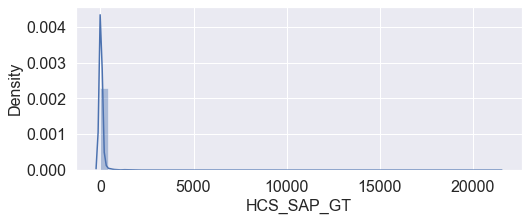

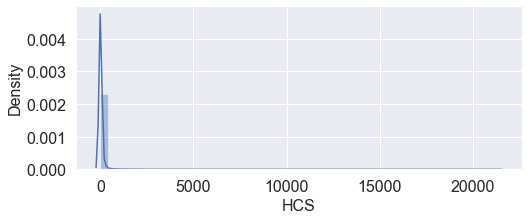

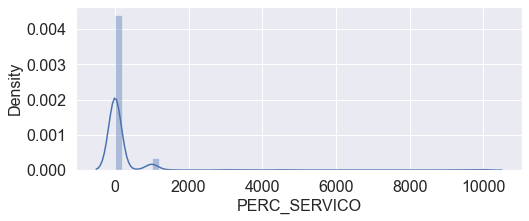

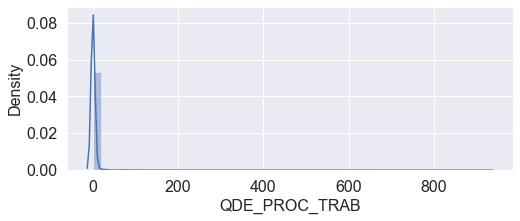

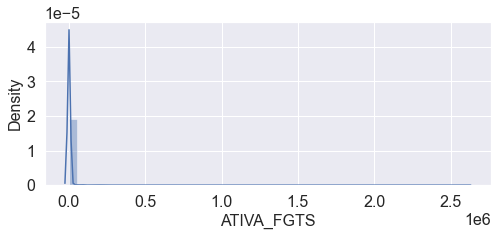

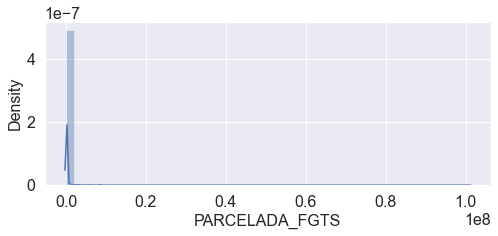

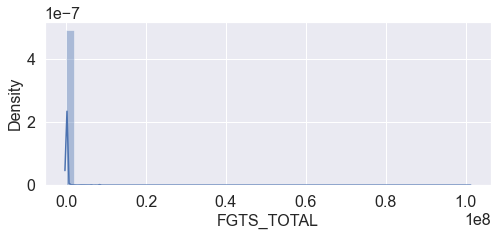

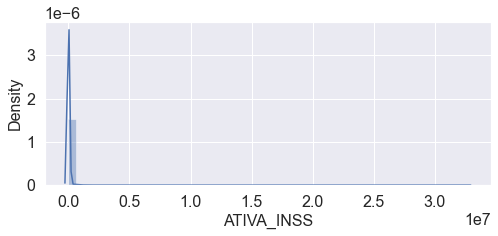

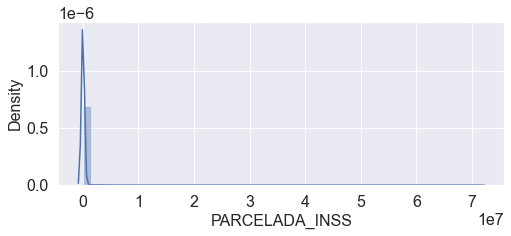

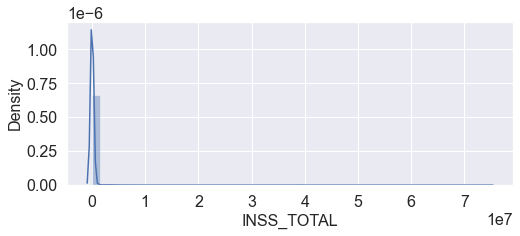

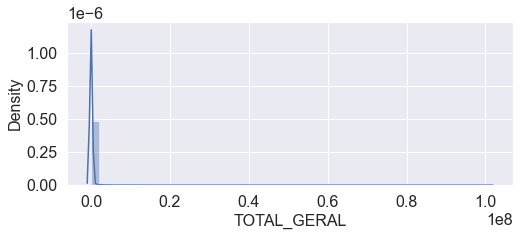

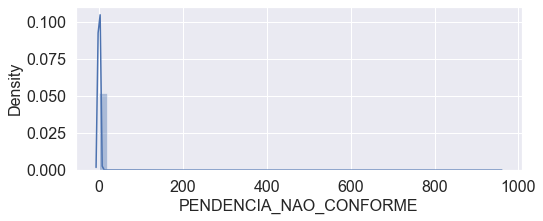

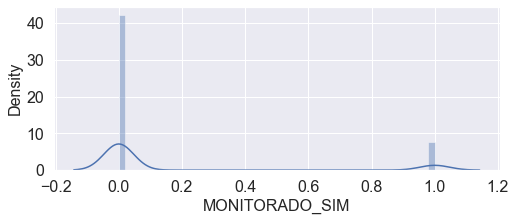

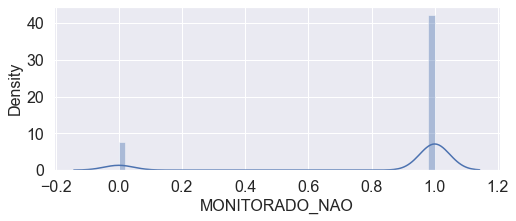

In [29]:
for i in aliados.columns:
    if 'int' in str(aliados[i].dtypes) or 'float' in str(aliados[i].dtypes):
        distplotfeature(aliados[[i]], i)


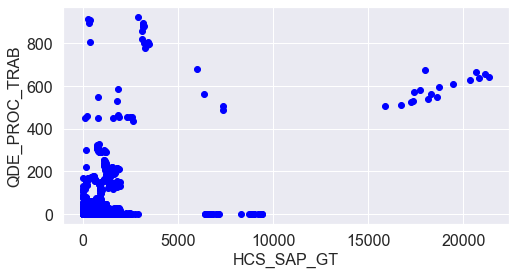

In [30]:
plt.figure(figsize=(8, 4))

columns = ['HCS_SAP_GT', 'QDE_PROC_TRAB']
plt.scatter(aliados[columns[0]], aliados[columns[1]], c = 'blue')
plt.xlabel(columns[0])
plt.ylabel(columns[1])
plt.show()

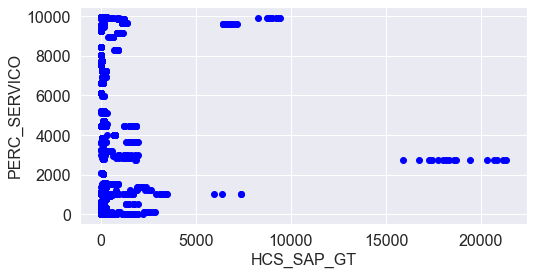

In [31]:
plt.figure(figsize=(8, 4))

columns = ['HCS_SAP_GT', 'PERC_SERVICO']
plt.scatter(aliados[columns[0]], aliados[columns[1]], c = 'blue')
plt.xlabel(columns[0])
plt.ylabel(columns[1])
plt.show()

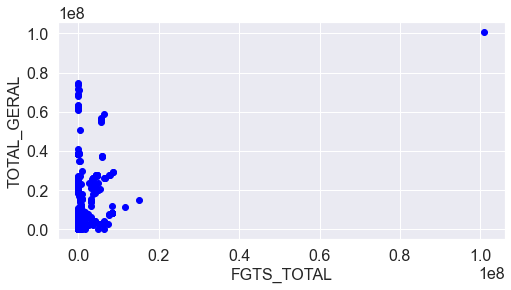

In [32]:
plt.figure(figsize=(8, 4))

columns = ['FGTS_TOTAL', 'TOTAL_GERAL']
plt.scatter(aliados[columns[0]], aliados[columns[1]], c = 'blue')
plt.xlabel(columns[0])
plt.ylabel(columns[1])
plt.show()

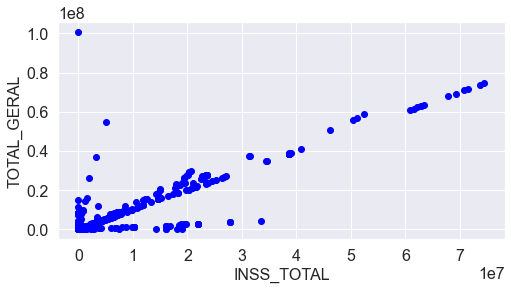

In [33]:
plt.figure(figsize=(8, 4))

columns = ['INSS_TOTAL', 'TOTAL_GERAL']
plt.scatter(aliados[columns[0]], aliados[columns[1]], c = 'blue')
plt.xlabel(columns[0])
plt.ylabel(columns[1])
plt.show()

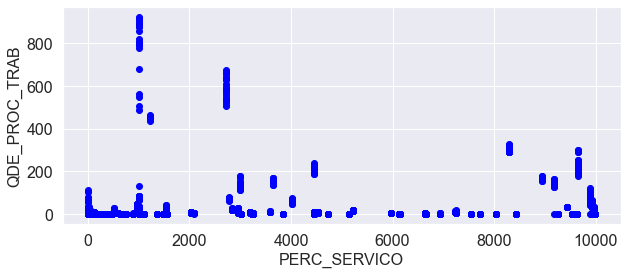

In [34]:
plt.figure(figsize=(10, 4))

columns = ['PERC_SERVICO', 'QDE_PROC_TRAB']
plt.scatter(aliados[columns[0]], aliados[columns[1]], c = 'blue')
plt.xlabel(columns[0])
plt.ylabel(columns[1])
#plt.title('{} | {}'.format(columns[0], columns[1]))
plt.show()

In [35]:
aliados.reset_index(drop=False, inplace=True)
aliados.head(3)

,COMPETENCIA,RAIZ_CNPJ,NOME_FORNECEDOR,HCS_SAP_GT,HCS,PERC_SERVICO,QDE_PROC_TRAB,ATIVA_FGTS,PARCELADA_FGTS,FGTS_TOTAL,ATIVA_INSS,PARCELADA_INSS,INSS_TOTAL,TOTAL_GERAL,PENDENCIA_NAO_CONFORME,MONITORADO_SIM,MONITORADO_NAO
0,2021-01-01,00000000,HODNET S/A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
1,2021-01-01,00000B60,ITP TECNOLOGICA SL,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
2,2021-01-01,00000B86,"DELOITTE ADVISORY, S.L.",1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1


#### Parceiros descontinuados:

- EZENTIS BRASIL S.A
- EZENTIS - SERVICOS ENGENHARIA E INSTALACAO DE COMUNICACOES S.A
- HALLEN INSTALACOES DE EQUIPAMENTOS DE TELECOMUNICACOES LTDA
- VIKSTAR CONTACT CENTER S/A

In [36]:
aliados[aliados['NOME_FORNECEDOR'].str.contains("VIKSTAR|HALLEN|EZENTIS")==True].head()

,COMPETENCIA,RAIZ_CNPJ,NOME_FORNECEDOR,HCS_SAP_GT,HCS,PERC_SERVICO,QDE_PROC_TRAB,ATIVA_FGTS,PARCELADA_FGTS,FGTS_TOTAL,ATIVA_INSS,PARCELADA_INSS,INSS_TOTAL,TOTAL_GERAL,PENDENCIA_NAO_CONFORME,MONITORADO_SIM,MONITORADO_NAO
44,2021-01-01,01307399,HALLEN INSTALAÇÕES DE EQUIPAMENTOS,1146.0,1146.0,9879.0,42.0,0.0,446000.0,446000.0,271000.0,2236000.0,2506000.0,2952000.0,0.0,1,0
293,2021-01-01,05823631,EZENTIS BRASIL S.A.,1556.0,1556.0,4461.0,186.0,0.0,970000.0,970000.0,13233000.0,43000.0,17263000.0,18233000.0,0.0,1,0
413,2021-01-01,08075274,VIKSTAR CONTACT CENTER S/A,7379.0,7379.0,1000.0,488.0,884000.0,3795000.0,468000.0,2657000.0,2078000.0,46135000.0,50815000.0,0.0,1,0
1245,2021-01-01,51946200,"EZENTIS - SERVIÇOS, ENGENHARIA E",71.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
1386,2021-02-01,01307399,HALLEN INSTALAÇÕES DE EQUIPAMENTOS,1172.0,1172.0,9879.0,43.0,0.0,427000.0,427000.0,412000.0,3792000.0,4204000.0,463000.0,0.0,1,0


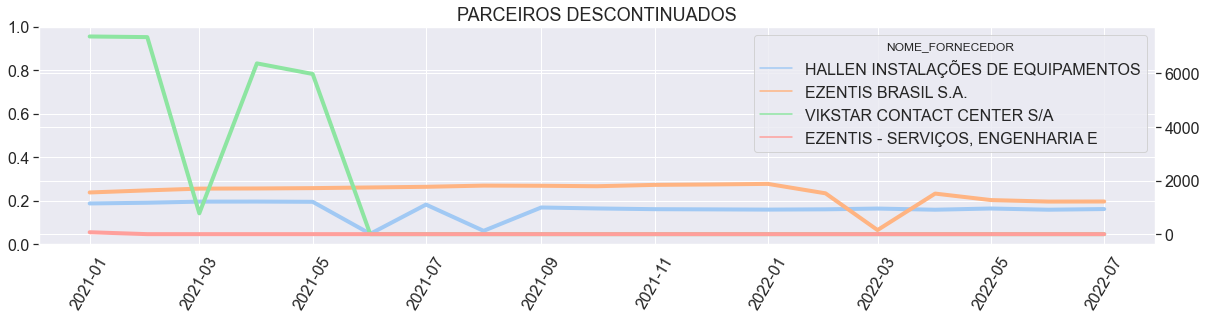

In [37]:
fig, ax = plt.subplots(figsize=(20, 4))
ax_twin = ax.twinx()

sns.lineplot(x="COMPETENCIA", y="HCS_SAP_GT", hue='NOME_FORNECEDOR', 
                linewidth=4, 
                data=aliados[aliados['NOME_FORNECEDOR'].str.contains("VIKSTAR|HALLEN|EZENTIS")==True])

ax.tick_params(axis='x', rotation=60)
plt.title('PARCEIROS DESCONTINUADOS')
plt.xlabel(None)
plt.ylabel(None)
plt.show()

### SALVAR DADOS:

In [38]:
aliados.to_csv(r'datasets/02_ALIADOS.csv', index = False, sep=';', encoding='utf-8', header='true')

In [39]:
#del aliados

### INDICADOR:

Indicadores da Base Aliados:

- <b>KPI_A1</b> = Aliados - Variação de Aliados
- <b>KPI_A2</b> = Aliados - Contencioso Trabalhista vs. Aliados Ativos
- <b>KPI_A3</b> = Aliados - Endividamento Encargos Sociais

In [64]:
del temp
aliados_kpi = aliados.copy()
aliados_kpi.head(3)

,COMPETENCIA,RAIZ_CNPJ,NOME_FORNECEDOR,HCS_SAP_GT,HCS,PERC_SERVICO,QDE_PROC_TRAB,ATIVA_FGTS,PARCELADA_FGTS,FGTS_TOTAL,ATIVA_INSS,PARCELADA_INSS,INSS_TOTAL,TOTAL_GERAL,PENDENCIA_NAO_CONFORME,MONITORADO_SIM,MONITORADO_NAO
0,2021-01-01,00000000,HODNET S/A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
1,2021-01-01,00000B60,ITP TECNOLOGICA SL,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
2,2021-01-01,00000B86,"DELOITTE ADVISORY, S.L.",1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1


In [66]:
def get_KPI_A1(v):
    if v <= 10:
        return 'BOM'
    elif v > 10 and v <= 25:
        return 'MEDIO'
    else:
        return 'RUIM'

aliados_kpi['MM6'] = aliados_kpi.groupby(['RAIZ_CNPJ', 'NOME_FORNECEDOR'])['HCS_SAP_GT'] \
    .transform(lambda x: x.rolling(6).mean()).fillna(0)
aliados_kpi['KPI_A1'] = aliados_kpi.apply(lambda x: (round((x.HCS_SAP_GT/x.MM6*100), 2) if x.MM6 > 0 else 0), axis=1)
aliados_kpi['KPI_A1'] = aliados_kpi['KPI_A1'].apply(get_KPI_A1)

aliados_kpi[['RAIZ_CNPJ','NOME_FORNECEDOR','COMPETENCIA','HCS_SAP_GT','KPI_A1']].tail(10)

,RAIZ_CNPJ,NOME_FORNECEDOR,COMPETENCIA,HCS_SAP_GT,KPI_A1
25781,94503281,COMERCIAL DE TELEFONIA ASSISTEL LTD,2022-07-01,0.0,BOM
25782,96298278,KANAMARU ADVOGADOS,2022-07-01,16.0,RUIM
25783,96418264,LOJAS QUERO-QUERO SA,2022-07-01,1.0,RUIM
25784,96428529,NIVALMIX LOJA DE DEPARTAMENTOS LTDA,2022-07-01,1.0,RUIM
25785,96534094,ACCENTURE DO BRASIL LTDA,2022-07-01,1371.0,RUIM
25786,96662168,DREBES E CIA LTDA,2022-07-01,1.0,RUIM
25787,98102924,DELTASUL UTILIDADES LTDA,2022-07-01,1.0,BOM
25788,B8677373,"NETMETRIX SOLUTIONS, S.L.",2022-07-01,0.0,BOM
25789,B9898262,"KENMEI TECHNOLOGIES, S.L.",2022-07-01,0.0,BOM
25790,ESB60217,ITP TECNOLOGICA SL,2022-07-01,0.0,BOM


In [67]:
def get_KPI_A2(v):
    if v <= 5:
        return 'BOM'
    elif v > 5 and v <= 20:
        return 'MEDIO'
    else:
        return 'RUIM'

aliados_kpi['KPI_A2'] = aliados_kpi.apply(lambda x: \
                                (round((x.QDE_PROC_TRAB/x.HCS_SAP_GT*100), 2) \
                                 if x.HCS_SAP_GT > 0 and x.QDE_PROC_TRAB > 0 else 0), axis=1)
aliados_kpi['KPI_A2'] = aliados_kpi['KPI_A2'].apply(get_KPI_A2)

aliados_kpi[['RAIZ_CNPJ','NOME_FORNECEDOR','COMPETENCIA','HCS_SAP_GT', 'QDE_PROC_TRAB','KPI_A1','KPI_A2']].tail(10)

,RAIZ_CNPJ,NOME_FORNECEDOR,COMPETENCIA,HCS_SAP_GT,QDE_PROC_TRAB,KPI_A1,KPI_A2
25781,94503281,COMERCIAL DE TELEFONIA ASSISTEL LTD,2022-07-01,0.0,0.0,BOM,BOM
25782,96298278,KANAMARU ADVOGADOS,2022-07-01,16.0,0.0,RUIM,BOM
25783,96418264,LOJAS QUERO-QUERO SA,2022-07-01,1.0,0.0,RUIM,BOM
25784,96428529,NIVALMIX LOJA DE DEPARTAMENTOS LTDA,2022-07-01,1.0,0.0,RUIM,BOM
25785,96534094,ACCENTURE DO BRASIL LTDA,2022-07-01,1371.0,0.0,RUIM,BOM
25786,96662168,DREBES E CIA LTDA,2022-07-01,1.0,0.0,RUIM,BOM
25787,98102924,DELTASUL UTILIDADES LTDA,2022-07-01,1.0,0.0,BOM,BOM
25788,B8677373,"NETMETRIX SOLUTIONS, S.L.",2022-07-01,0.0,0.0,BOM,BOM
25789,B9898262,"KENMEI TECHNOLOGIES, S.L.",2022-07-01,0.0,0.0,BOM,BOM
25790,ESB60217,ITP TECNOLOGICA SL,2022-07-01,0.0,0.0,BOM,BOM


In [68]:
def get_KPI_A3(x):
    if x.TOTAL_GERAL > 0:
        if x.FGTS_TOTAL > 0:
            return 'RUIM'
        else:
            return 'MEDIO'
    return 'BOM'

aliados_kpi['KPI_A3'] = aliados_kpi.apply(get_KPI_A3, axis=1)
aliados_kpi[['RAIZ_CNPJ','NOME_FORNECEDOR','COMPETENCIA','FGTS_TOTAL','TOTAL_GERAL','KPI_A1','KPI_A2','KPI_A3']].tail(10)

,RAIZ_CNPJ,NOME_FORNECEDOR,COMPETENCIA,FGTS_TOTAL,TOTAL_GERAL,KPI_A1,KPI_A2,KPI_A3
25781,94503281,COMERCIAL DE TELEFONIA ASSISTEL LTD,2022-07-01,0.0,0.0,BOM,BOM,BOM
25782,96298278,KANAMARU ADVOGADOS,2022-07-01,0.0,0.0,RUIM,BOM,BOM
25783,96418264,LOJAS QUERO-QUERO SA,2022-07-01,0.0,0.0,RUIM,BOM,BOM
25784,96428529,NIVALMIX LOJA DE DEPARTAMENTOS LTDA,2022-07-01,0.0,0.0,RUIM,BOM,BOM
25785,96534094,ACCENTURE DO BRASIL LTDA,2022-07-01,0.0,0.0,RUIM,BOM,BOM
25786,96662168,DREBES E CIA LTDA,2022-07-01,0.0,0.0,RUIM,BOM,BOM
25787,98102924,DELTASUL UTILIDADES LTDA,2022-07-01,0.0,0.0,BOM,BOM,BOM
25788,B8677373,"NETMETRIX SOLUTIONS, S.L.",2022-07-01,0.0,0.0,BOM,BOM,BOM
25789,B9898262,"KENMEI TECHNOLOGIES, S.L.",2022-07-01,0.0,0.0,BOM,BOM,BOM
25790,ESB60217,ITP TECNOLOGICA SL,2022-07-01,0.0,0.0,BOM,BOM,BOM


#### Colorir os KPI's para melhorar a visualização:

In [74]:
def color_KPI(s):
    colors = ['', 'background-color: #63f642', 'background-color: yellow', 'background-color: #f71906']
    r = []
    for i in s.values:
        if i == 'BOM':
            r.append(colors[1])
        elif i in ('MÉDIO', 'MEDIO'):
            r.append(colors[2])
        elif i == 'RUIM':
            r.append(colors[3])
        else:
            r.append(colors[0])        
    return r
    
aliados_kpi[aliados_kpi['NOME_FORNECEDOR'].str.contains("ATENTO")==True] \
    [['RAIZ_CNPJ','NOME_FORNECEDOR','COMPETENCIA','KPI_A1','KPI_A2','KPI_A3']].tail(15) \
    .style \
    .apply(color_KPI, subset=['KPI_A1']) \
    .apply(color_KPI, subset=['KPI_A2']) \
    .apply(color_KPI, subset=['KPI_A3'])


,RAIZ_CNPJ,NOME_FORNECEDOR,COMPETENCIA,KPI_A1,KPI_A2,KPI_A3
5468,02879250,ATENTO BRASIL S/A,2021-05-01 00:00:00,BOM,BOM,BOM
6810,02879250,ATENTO BRASIL S/A,2021-06-01 00:00:00,RUIM,BOM,BOM
8152,02879250,ATENTO BRASIL S/A,2021-07-01 00:00:00,RUIM,BOM,RUIM
9494,02879250,ATENTO BRASIL S/A,2021-08-01 00:00:00,RUIM,BOM,RUIM
10836,02879250,ATENTO BRASIL S/A,2021-09-01 00:00:00,MEDIO,RUIM,RUIM
12178,02879250,ATENTO BRASIL S/A,2021-10-01 00:00:00,RUIM,BOM,RUIM
13520,02879250,ATENTO BRASIL S/A,2021-11-01 00:00:00,RUIM,BOM,RUIM
14862,02879250,ATENTO BRASIL S/A,2021-12-01 00:00:00,RUIM,BOM,RUIM
16204,02879250,ATENTO BRASIL S/A,2022-01-01 00:00:00,RUIM,BOM,RUIM
17546,02879250,ATENTO BRASIL S/A,2022-02-01 00:00:00,RUIM,BOM,RUIM


### POC:

- Uma ideia seria reformular os indicadores:
    - Seja alterando o período na média móvel (por exemplo, 3 ao invés de 6 períodos)
    - Analisando outras medidas (mediana, desvio padrão, etc)
- Outra maneira seria projetar os indicadores futuros, uma vez que são construídos com base em características numéricas.

#### KPI_A1_V2 = Reformulando o indicador "KPI_A1" utilizando média móvel com 3 períodos:

- Aparentemente, resultados não muito promissores.

In [79]:
def get_KPI_A1_VERSAO2(v):
    if v <= 10:
        return 'BOM'
    elif v > 10 and v <= 25:
        return 'MEDIO'
    else:
        return 'RUIM'

aliados_kpi['MM3'] = aliados_kpi.groupby(['RAIZ_CNPJ', 'NOME_FORNECEDOR'])['HCS_SAP_GT'] \
    .transform(lambda x: x.rolling(3).mean()).fillna(0)
aliados_kpi['KPI_A1_V2'] = aliados_kpi.apply(lambda x: (round((x.HCS_SAP_GT/x.MM3*100), 2) if x.MM3 > 0 else 0), axis=1)
aliados_kpi['KPI_A1_V2'] = aliados_kpi['KPI_A1_V2'].apply(get_KPI_A1_VERSAO2)

aliados_kpi[aliados_kpi['NOME_FORNECEDOR'].str.contains('ATENTO')==True] \
    [['RAIZ_CNPJ','NOME_FORNECEDOR','COMPETENCIA','HCS_SAP_GT','KPI_A1','KPI_A1_V2']] \
    .style \
    .apply(color_KPI, subset=['KPI_A1']) \
    .apply(color_KPI, subset=['KPI_A1_V2'])


,RAIZ_CNPJ,NOME_FORNECEDOR,COMPETENCIA,HCS_SAP_GT,KPI_A1,KPI_A1_V2
100,02879250,ATENTO BRASIL S/A,2021-01-01 00:00:00,17996.000000,BOM,BOM
1442,02879250,ATENTO BRASIL S/A,2021-02-01 00:00:00,20681.000000,BOM,BOM
2784,02879250,ATENTO BRASIL S/A,2021-03-01 00:00:00,21123.000000,BOM,RUIM
4126,02879250,ATENTO BRASIL S/A,2021-04-01 00:00:00,21326.000000,BOM,RUIM
5468,02879250,ATENTO BRASIL S/A,2021-05-01 00:00:00,20838.000000,BOM,RUIM
6810,02879250,ATENTO BRASIL S/A,2021-06-01 00:00:00,20321.000000,RUIM,RUIM
8152,02879250,ATENTO BRASIL S/A,2021-07-01 00:00:00,19439.000000,RUIM,RUIM
9494,02879250,ATENTO BRASIL S/A,2021-08-01 00:00:00,18694.000000,RUIM,RUIM
10836,02879250,ATENTO BRASIL S/A,2021-09-01 00:00:00,1866.000000,MEDIO,MEDIO
12178,02879250,ATENTO BRASIL S/A,2021-10-01 00:00:00,17727.000000,RUIM,RUIM


#### KPI_A1_V3 = Reformulando o indicador "KPI_A1" utilizando média móvel com 6 períodos e desvio padrão (zscore):


In [93]:
def get_KPI_A1_VERSAO3(v):
    if v > -1 and v < 1:
        return 'BOM'
    elif (v > -2 and v <= -1) or (v < 2 and v >= 1):
        return 'MEDIO'
    else:
        return 'RUIM'

aliados_kpi['MM6'] = aliados_kpi.groupby(['RAIZ_CNPJ', 'NOME_FORNECEDOR'])['HCS_SAP_GT'] \
    .transform(lambda x: x.rolling(6).mean()).fillna(0)
aliados_kpi['MM6_STD'] = aliados_kpi.groupby(['RAIZ_CNPJ', 'NOME_FORNECEDOR'])['HCS_SAP_GT'] \
    .transform(lambda x: x.rolling(6).std()).fillna(0)
aliados_kpi['MM6_STD'] = aliados_kpi.apply(lambda x: round(((x.HCS_SAP_GT - x.MM6)/x.MM6_STD), 2) \
                                             if x.MM6_STD > 0 else 0, axis=1)
aliados_kpi['KPI_A1_V3'] = aliados_kpi['MM6_STD'].apply(get_KPI_A1_VERSAO3)
aliados_kpi.drop(['MM6_STD', 'MM6'], axis=1, inplace=True)

aliados_kpi[aliados_kpi['NOME_FORNECEDOR'].str.contains('ATENTO')==True] \
    [['RAIZ_CNPJ','NOME_FORNECEDOR','COMPETENCIA','HCS_SAP_GT', 'KPI_A1','KPI_A1_V3']] \
    .style \
    .apply(color_KPI, subset=['KPI_A1']) \
    .apply(color_KPI, subset=['KPI_A1_V3'])


,RAIZ_CNPJ,NOME_FORNECEDOR,COMPETENCIA,HCS_SAP_GT,KPI_A1,KPI_A1_V3
100,02879250,ATENTO BRASIL S/A,2021-01-01 00:00:00,17996.000000,BOM,BOM
1442,02879250,ATENTO BRASIL S/A,2021-02-01 00:00:00,20681.000000,BOM,BOM
2784,02879250,ATENTO BRASIL S/A,2021-03-01 00:00:00,21123.000000,BOM,BOM
4126,02879250,ATENTO BRASIL S/A,2021-04-01 00:00:00,21326.000000,BOM,BOM
5468,02879250,ATENTO BRASIL S/A,2021-05-01 00:00:00,20838.000000,BOM,BOM
6810,02879250,ATENTO BRASIL S/A,2021-06-01 00:00:00,20321.000000,RUIM,BOM
8152,02879250,ATENTO BRASIL S/A,2021-07-01 00:00:00,19439.000000,RUIM,MEDIO
9494,02879250,ATENTO BRASIL S/A,2021-08-01 00:00:00,18694.000000,RUIM,MEDIO
10836,02879250,ATENTO BRASIL S/A,2021-09-01 00:00:00,1866.000000,MEDIO,RUIM
12178,02879250,ATENTO BRASIL S/A,2021-10-01 00:00:00,17727.000000,RUIM,BOM


In [94]:
del aliados_kpi
del aliados